In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
forcing=np.genfromtxt('asc_files/IMD_1975_2013.txt',  dtype=float, autostrip=True)
original_data = forcing[:,1]

In [3]:
import numpy as np

def increase_precipitation_intensity(precipitation_data, intensity_factor, dry_spell_extension, long_dry_spell_duration):
    adjusted_data = np.copy(precipitation_data)  # Create a copy of the original data

    # Identify dry spell periods
    is_dry_spell = (adjusted_data == 0)

    # Extend existing dry spells by several days
    for i in range(1, len(adjusted_data)):
        if is_dry_spell[i] and is_dry_spell[i - 1]:
            # Extend the dry spell by the specified number of days
            extended_duration = min(i + dry_spell_extension, len(adjusted_data)) - i
            adjusted_data[i:i+extended_duration] = 0

    # Create longer dry spells of 2-4 weeks
    for i in range(len(adjusted_data)):
        if is_dry_spell[i]:
            # Randomly select a longer dry spell duration
            long_duration = np.random.randint(14, long_dry_spell_duration + 1)
            # Set the precipitation values to zero for the selected duration
            adjusted_data[i:i+long_duration] = 0

    # Adjust the intensity of positive precipitation values
    positive_precipitation = adjusted_data[adjusted_data > 0]
    adjusted_positive_precipitation = positive_precipitation * intensity_factor
    adjusted_data[adjusted_data > 0] = adjusted_positive_precipitation

    return adjusted_data

# Example usage
intensity_factor = 1.5  # Adjust the factor as desired
dry_spell_extension = 3  # Number of days to extend existing dry spells
long_dry_spell_duration = np.random.randint(14, 29)  # Randomly select a duration between 2 and 4 weeks

adjusted_data = increase_precipitation_intensity(original_data, intensity_factor, dry_spell_extension, long_dry_spell_duration)
print(adjusted_data)
print(original_data)  # Original data remains unchanged


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


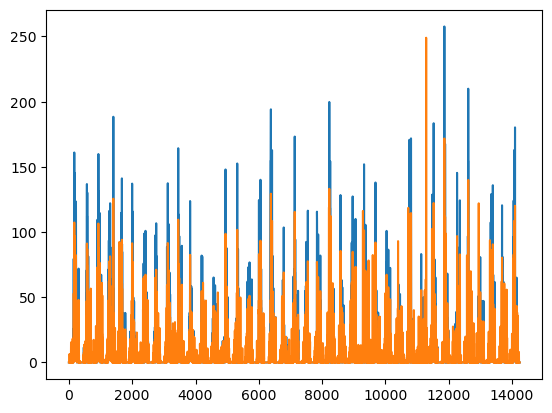

In [4]:
plt.plot(adjusted_data)
plt.plot(original_data)

In [5]:
print(np.sum(original_data), np.mean(original_data), len(original_data[original_data==0]))
print(np.sum(adjusted_data), np.mean(adjusted_data), len(adjusted_data[adjusted_data==0]))

95138.33 6.678717444717445 6020
98599.26000000001 6.921674973674975 10375


In [6]:
forcing_scen1 = forcing
forcing_scen1[:,2] * 1.07
forcing_scen1[:,1] = adjusted_data

In [7]:
np.savetxt('forcing_2.txt', forcing_scen1)